In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,Aer
import math
from qiskit.tools.monitor import job_monitor
print("Imports Successful")

Imports Successful


In [29]:
pi = math.pi
q = QuantumRegister(4,'q')
c = ClassicalRegister(4,'c')
qc = QuantumCircuit(q,c)

qc.h(q)
#Oracle

qc.x(q[0])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.x(q[0])
#Amplification
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])

qc.cu1(pi/4, q[0], q[3])
qc.cx(q[0], q[1])
qc.cu1(-pi/4, q[1], q[3])
qc.cx(q[0], q[1])
qc.cu1(pi/4, q[1], q[3])
qc.cx(q[1], q[2])
qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])
qc.cx(q[1], q[2])

qc.cu1(-pi/4, q[2], q[3])
qc.cx(q[0], q[2])
qc.cu1(pi/4, q[2], q[3])

qc.barrier(q)
qc.x(q[0])
qc.x(q[1])
qc.x(q[2])
qc.x(q[3])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

### Measurment ###
qc.barrier(q)
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])
qc.measure(q[3], c[3])
qc.draw()


┌───┐┌───┐                                                              »
q_0: ┤ H ├┤ X ├─■──────────■───────────────■──────────────────────────────■──»
     ├───┤└───┘ │        ┌─┴─┐           ┌─┴─┐                            │  »
q_1: ┤ H ├──────┼────────┤ X ├─■─────────┤ X ├─■──────────■───────────────┼──»
     ├───┤      │        └───┘ │         └───┘ │        ┌─┴─┐           ┌─┴─┐»
q_2: ┤ H ├──────┼──────────────┼───────────────┼────────┤ X ├─■─────────┤ X ├»
     ├───┤      │U1(π/4)       │U1(-π/4)       │U1(π/4) └───┘ │U1(-π/4) └───┘»
q_3: ┤ H ├──────■──────────────■───────────────■──────────────■──────────────»
     └───┘                                                                   »
c: 4/════════════════════════════════════════════════════════════════════════»
                                                                             »
«                                      ┌───┐   ┌───┐┌───┐               »
«q_0: ────────────────────────────■────┤ X ├───┤ H ├┤ X ├─■──────────■──»
«                       ┌───┐     │    ├───┤   └───┘└───┘ │        ┌─┴─┐»
«q_1: ────────────■─────┤ H ├─────┼────┤ X ├──────────────┼────────┤ X ├»
«               ┌─┴─┐   └───┘   ┌─┴─┐  └───┘   ┌───┐┌───┐ │        └───┘»
«q_2: ─■────────┤ X ├─■─────────┤ X ├─■────────┤ H ├┤ X ├─┼─────────────»
«      │U1(π/4) └───┘ │U1(-π/4) └───┘ │U1(π/4) ├───┤├───┤ │U1(π/4)      »
«q_3: ─■──────────────■───────────────■────────┤ H ├┤ X ├─■─────────────»
«                                              └───┘└───┘               »
«c: 4/══════════════════════════════════════════════════════════════════»
«                                                                       »
«                                                                              »
«q_0: ─────────────■──────────────────────────────■────────────────────────────»
«                ┌─┴─┐                            │                            »
«q_1: ─■─────────┤ X ├─■──────────■───────────────┼──────────────■─────────────»
«      │         └───┘ │        ┌─┴─┐           ┌─┴─┐          ┌─┴─┐           »
«q_2: ─┼───────────────┼────────┤ X ├─■─────────┤ X ├─■────────┤ X ├─■─────────»
«      │U1(-π/4)       │U1(π/4) └───┘ │U1(-π/4) └───┘ │U1(π/4) └───┘ │U1(-π/4) »
«q_3: ─■───────────────■──────────────■───────────────■──────────────■─────────»
«                                                                              »
«c: 4/═════════════════════════════════════════════════════════════════════════»
«                                                                              »
«                     ░ ┌───┐┌───┐ ░ ┌─┐         
«q_0: ──■─────────────░─┤ X ├┤ H ├─░─┤M├─────────
«       │             ░ ├───┤├───┤ ░ └╥┘┌─┐      
«q_1: ──┼─────────────░─┤ X ├┤ H ├─░──╫─┤M├──────
«     ┌─┴─┐           ░ ├───┤├───┤ ░  ║ └╥┘┌─┐   
«q_2: ┤ X ├─■─────────░─┤ X ├┤ H ├─░──╫──╫─┤M├───
«     └───┘ │U1(π/4)  ░ ├───┤├───┤ ░  ║  ║ └╥┘┌─┐
«q_3: ──────■─────────░─┤ X ├┤ H ├─░──╫──╫──╫─┤M├
«                     ░ └───┘└───┘ ░  ║  ║  ║ └╥┘
«c: 4/════════════════════════════════╩══╩══╩══╩═
«                                     0  1  2  3

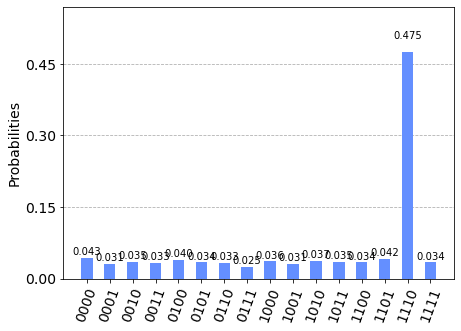

In [30]:
# Simulate and plot results
from qiskit import *
from qiskit.visualization import plot_histogram
qasm_simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, qasm_simulator)
qobj = assemble(transpiled_qc)
result = qasm_sim.run(qobj).result()
plot_histogram(result.get_counts())

/home/rbh/miniconda3/envs/quanMech/lib/python3.9/site-packages/qiskit/aqua/algorithms/amplitude_amplifiers/grover.py:215: DeprecationWarning: The package qiskit.aqua.algorithms.amplitude_amplifiers is deprecated. It was moved/refactored to qiskit.algorithms.amplitude_amplifiers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.algorithms.amplitude_amplifiers',
/home/rbh/miniconda3/envs/quanMech/lib/python3.9/site-packages/qiskit/aqua/quantum_instance.py:135: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_class('aqua.QuantumInstance',
[-1, -2, -3]


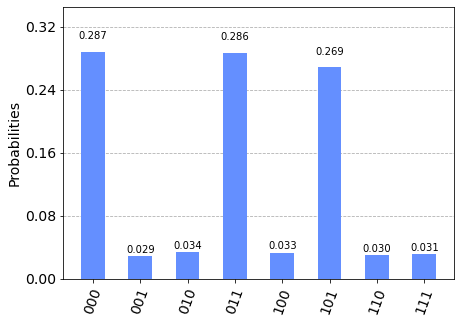

In [49]:
import numpy as np
from qiskit import BasicAer
from qiskit.visualization import plot_histogram
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle

input_3sat = '''
c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0
'''


oracle = LogicalExpressionOracle(input_3sat)
grover = Grover(oracle)

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result['assignment'])


plot_histogram(result['measurement'])

# Again...

In [36]:
from qiskit import QuantumCircuit
import numpy as np
noQubit = 3
noCbit  = noQubit
qc = QuantumCircuit(noQubit, noQubit)
#1. Init; Turn all Qubits to superposition
setHadGate(qc, noQubit) 
qc.barrier()
#2. Oracle; a blackbox "designed" by dataset designer

qc.barrier()
#3. Amplifier

#setHadGate(qc, noQubit) 
setDiffuser(qc, noQubit)
qc.barrier()
setMeasure(qc, noQubit)


qc.draw()

┌───┐ ░  ░ ┌───┐┌───┐┌───┐┌───┐┌───┐     ┌───┐┌───┐      ░ ┌─┐      
q_0: ┤ H ├─░──░─┤ H ├┤ H ├┤ X ├┤ X ├┤ H ├──■──┤ X ├┤ H ├──────░─┤M├──────
     ├───┤ ░  ░ ├───┤├───┤├───┤├───┤├───┤  │  ├───┤├───┤      ░ └╥┘┌─┐   
q_1: ┤ H ├─░──░─┤ H ├┤ H ├┤ X ├┤ X ├┤ H ├──■──┤ X ├┤ H ├──────░──╫─┤M├───
     ├───┤ ░  ░ ├───┤├───┤├───┤└───┘└───┘┌─┴─┐├───┤├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├─░──░─┤ H ├┤ H ├┤ X ├──────────┤ X ├┤ H ├┤ X ├┤ H ├─░──╫──╫─┤M├
     └───┘ ░  ░ └───┘└───┘└───┘          └───┘└───┘└───┘└───┘ ░  ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════════╩══╩══╩═
                                                                 0  1  2

In [ ]:
# Simulate and plot results
qasm_simulator = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, qasm_simulator)
qobj = assemble(transpiled_qc)
result = qasm_sim.run(qobj).result()
plot_histogram(result.get_counts())

In [32]:
def setHadGate(qc, noQubit):#assign Hadamard gate to all qubit
    for i in range(noQubit): 
        qc.h(i)
def setMeasure(qc, noQubit):
    qc.measure(np.linspace(0,noQubit-1,noQubit, dtype=int)
,np.linspace(0,noQubit-1,noQubit, dtype=int)
)

def setDiffuser(qc, noQubit):
    setHadGate(qc, noQubit)
    for i in range(noQubit): 
        qc.x(i)
    for i in range(noQubit-1): 
        qc.x(i)
    setHadGate(qc, noQubit-1)
    qc.mct(list(range(noQubit-1)), noQubit-1)
    qc.h(noQubit-1)
    for i in range(noQubit): 
        qc.x(i)
    setHadGate(qc, noQubit)


### Implementation of Grover's Search Algo

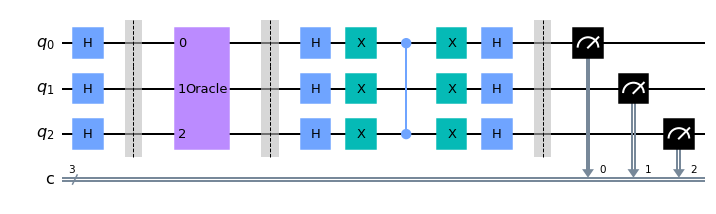

In [137]:
#Import libraries from qiskit
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator

noQubit = 3
q = QuantumRegister(noQubit, 'q')
c = ClassicalRegister(noQubit, 'c')
qc = QuantumCircuit(q,c)

#1. Init; Turn all Qubits to superposition
qc.h(q)

#qc.cz(q[-1],q[0])
qc.barrier(q)
#Turn all qubits to superposition

#2. Oracle; a blackbox "designed" by dataset designer
winner = int('111', 2)
oracleNp=np.identity(2**noQubit, dtype=complex)
oracleNp[winner,winner] = -1 #Turn the winner to -1
oracle=Operator(oracleNp)
qc.unitary(oracle, [i for i in range(noQubit)], label='Oracle')


#Turn all qubits form superposition to abs state
qc.barrier(q)
qc.h(q)
qc.x(q)
qc.cz(q[-1],q[0])
qc.x(q)
qc.h(q)
qc.barrier(q)


qc.measure(q,c)

qc.draw(output='mpl')

#3. Amplifier


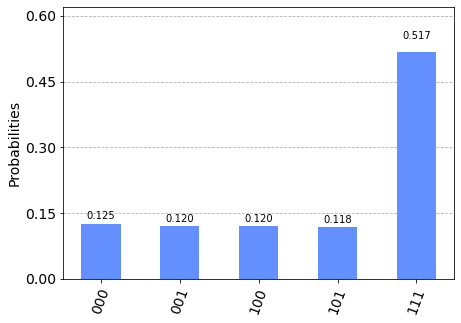

In [138]:
# Step 4: Run on backend simulator and print results
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1024).result()
counts = result.get_counts()

#print('RESULT: ',counts,'\n')

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [118]:
noQubit = 3
q = QuantumRegister(noQubit, 'q')
c = ClassicalRegister(noQubit, 'c')
qc = QuantumCircuit(q,c)


winner = 3
oracleNp=np.identity(2**noQubit, dtype=complex)
oracleNp[winner,winner] = -1 #Turn the winner to -1
oracle=Operator(oracleNp)
qc.unitary(oracle, [i for i in range(noQubit)], label='Oracle')

qc.draw()

┌─────────┐
q_0: ┤0        ├
     │         │
q_1: ┤1 oracle ├
     │         │
q_2: ┤2        ├
     └─────────┘
c: 3/═══════════

In [117]:
oracleNp

array([[1.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 1.+0.j]])

In [58]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator
controls = QuantumRegister(2)
circuit = QuantumCircuit(controls)

cx = Operator([
    [1, 0, 0, 0],
    [0, -1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])
circuit.unitary(cx, [0, 1], label='Qf')
circuit.draw()

┌─────┐
q131_0: ┤0    ├
        │  Qf │
q131_1: ┤1    ├
        └─────┘

In [59]:
cx

Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))